In [5]:
import rasterio as rio
cross_lochs_test = rio.open('../../preprocessed_data/dimensionality_reduction/cross_lochs_2.tif')
# number of bands
cross_lochs_test.count
# read bands
array = cross_lochs_test.read()
# convert to a DataFrame
import pandas as pd
cross_lochs_df = pd.DataFrame()

array_num = 0
band_num = 1

for num in range(358):
    cross_lochs_df['band' +str(band_num)]=array[array_num].ravel()
    array_num += 1
    band_num += 1


cross_lochs_df.head(2)

# NB when do this, will want a PFT column, which will include in randmisation, then split the train and 
# test data into x (bands) and y (PFT)

/tmp/ipykernel_22238/2032542278.py:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  cross_lochs_df['band' +str(band_num)]=array[array_num].ravel()


,band1,band2,band3,band4,band5,band6,band7,band8,band9,band10,...,band349,band350,band351,band352,band353,band354,band355,band356,band357,band358
0,0.001099,0.003430,0.004752,0.006146,0.006639,0.009240,0.010558,0.011710,0.013801,0.015441,...,0.077946,0.077413,0.077153,0.078934,0.074587,0.072792,0.075150,0.074088,0.074698,0.072249
1,0.003365,0.002541,0.004668,0.006236,0.006519,0.008654,0.010603,0.012083,0.012975,0.015468,...,0.075149,0.073557,0.071610,0.071727,0.069210,0.070987,0.072956,0.070970,0.067680,0.067113


In [6]:
import pandas as pd
wavelengths = pd.read_csv("../../preprocessed_data/wavelengths.csv")

https://github.com/amirhszd/ContinuumRemoval/blob/master/Continuum_Remval.py

In [8]:
cross_lochs_df.loc['mean'] = cross_lochs_df.mean()
mean = cross_lochs_df.loc[['mean']]
mean.head()

,band1,band2,band3,band4,band5,band6,band7,band8,band9,band10,...,band349,band350,band351,band352,band353,band354,band355,band356,band357,band358
mean,0.001254,0.002138,0.00396,0.005098,0.00612,0.008425,0.010456,0.012139,0.014304,0.016267,...,0.08206,0.082205,0.081238,0.082423,0.080989,0.081207,0.08155,0.082234,0.080923,0.080996


In [9]:
original_spectra = mean.transpose()
original_spectra = original_spectra.rename(columns={'mean': 'Original Spectra'})
#original_spectra = original_spectra.rename(index={0:357}) # want to rename to match the other dataframe
original_spectra = original_spectra.reset_index()
# original_spectra = 
original_spectra.head()
original_spectra.describe()

,Original Spectra
count,358.000000
mean,0.175729
std,0.099915
min,0.001254
25%,0.093539
50%,0.181250
75%,0.261180
max,0.499453


In [16]:
continuum_removal = pd.concat([wavelengths,original_spectra], axis=1)
continuum_removal.head()

,Wavelength,index,Original Spectra
0,377.071821,band1,0.001254
1,382.081821,band2,0.002138
2,387.091821,band3,0.003960
3,392.101821,band4,0.005098
4,397.101821,band5,0.006120


In [38]:
Increment = (0.00375-0.00112)/358

# most complex column:
continuum_removal["continuum"] = ""
first_original_reflectance_value = continuum_removal.iloc[0]["Original Spectra"]
#print(first_original_reflectance_value)
multiply_num = 1
index_num = 0

# continuum_removal.iloc[index_num, 3] = first_original_reflectance_value + (Increment * multiply_num)
# print(continuum_removal.iloc[0, 3])

for index, row in continuum_removal.iterrows():
    continuum_removal.iloc[index_num, 3] = first_original_reflectance_value + (Increment * multiply_num)
    multiply_num += 1
    index_num += 1
    

continuum_removal["continuum removed"] = continuum_removal["Original Spectra"] / continuum_removal["continuum"]
continuum_removal["band depth"] = 1 - continuum_removal["continuum removed"]
sum_band_depth = continuum_removal["band depth"].sum()
continuum_removal["normalised band depth"] = continuum_removal["band depth"] / sum_band_depth
sum_continuum_removed = continuum_removal["continuum removed"].sum()
continuum_removal["BDNA"] = continuum_removal["continuum removed"] / sum_continuum_removed

print(continuum_removal)


      Wavelength    index  Original Spectra continuum continuum removed  \
0     377.071821    band1          0.001254  0.001262          0.994177   
1     382.081821    band2          0.002138  0.001269          1.684657   
2     387.091821    band3          0.003960  0.001276          3.102246   
3     392.101821    band4          0.005098  0.001284          3.970893   
4     397.101821    band5          0.006120  0.001291          4.740442   
..           ...      ...               ...       ...               ...   
353  2375.531821  band354          0.081207  0.003855         21.065357   
354  2380.541821  band355          0.081550  0.003862         21.114222   
355  2385.551821  band356          0.082234   0.00387         21.250924   
356  2390.561821  band357          0.080923  0.003877         20.872586   
357  2395.561821  band358          0.080996  0.003884         20.851783   

    band depth normalised band depth      BDNA  
0     0.005823                  -0.0  0.000039  
1

[Text(0.5, 0, 'Bands'), Text(0, 0.5, 'BDNA')]

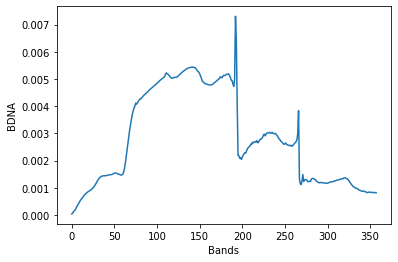

In [41]:
band_depth_normalied_by_area = continuum_removal["BDNA"].plot.line()
band_depth_normalied_by_area.set(xlabel="Bands", ylabel="BDNA")

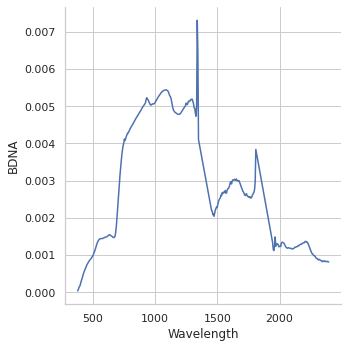

In [53]:
import seaborn as sns

sns.set_theme(style = "whitegrid")

sns.relplot(x="Wavelength", y="BDNA", kind="line", data=continuum_removal)
